# Plotting GPT-3.5 Turbo and GPT-4 performance

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
smiles_random = pd.read_csv('smiles_random_metrics.csv', sep='\t')
smiles_tanimoto = pd.read_csv('smiles_tanimoto_metrics.csv', sep='\t')
text_random = pd.read_csv('text_random_metrics.csv')

In [77]:
def make_dataset(df):
    
    """This function leaves only GPT-3.5 Turbo and GPT-4 and corresponding F1-scores in a dataset."""
    
    df = df.drop(columns=['provider', 'sampler', 'seed', 'precision', 'recall'])
    if 'dataset' in df.columns:
        df = df.drop(columns=['dataset'])
    df_mean = df[df.engine.isin(['gpt-3.5-turbo', 'gpt-4'])].groupby(by=['engine', 'n_for_train']).mean().rename(columns={'accuracy': 'accuracy_mean', 'f1': 'f1_mean'})
    df_std = df[df.engine.isin(['gpt-3.5-turbo', 'gpt-4'])].groupby(by=['engine', 'n_for_train']).std().rename(columns={'accuracy': 'accuracy_std', 'f1': 'f1_std'})
    df_all = df_mean.merge(df_std, on=['engine', 'n_for_train']).drop(columns=['accuracy_mean', 'accuracy_std']).reset_index()
    return df_all

In [78]:
smiles_random = make_dataset(smiles_random)
smiles_tanimoto = make_dataset(smiles_tanimoto)
text_random = make_dataset(text_random)
text_random

,engine,n_for_train,f1_mean,f1_std
0,gpt-3.5-turbo,2,0.675497,0.000000
1,gpt-3.5-turbo,4,0.389919,0.074015
2,gpt-3.5-turbo,6,0.607923,0.128908
3,gpt-3.5-turbo,8,0.548592,0.214446
4,gpt-3.5-turbo,10,0.556964,0.157525
5,gpt-4,2,0.670222,0.003701
6,gpt-4,4,0.074374,0.036014
7,gpt-4,6,0.530242,0.204829
8,gpt-4,8,0.512697,0.245472
9,gpt-4,10,0.475410,0.265518


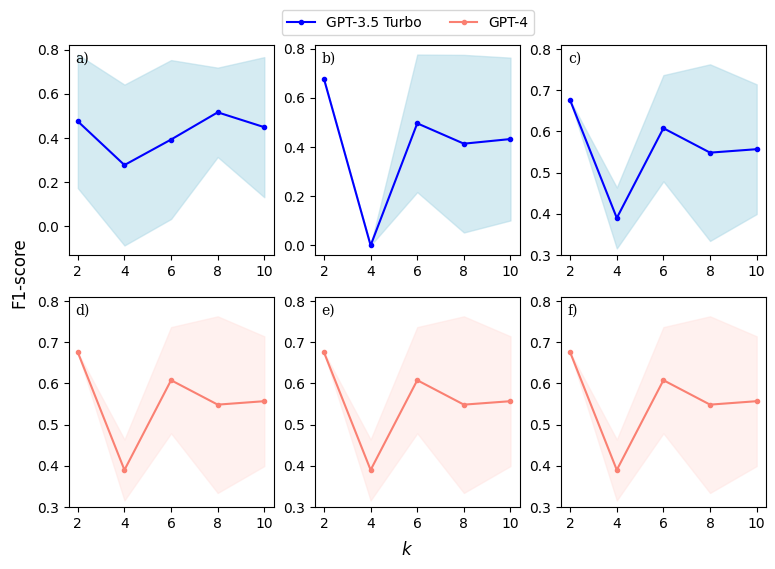

In [79]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplot_mosaic('abc;def', figsize=(9, 6))

for label, axs in ax.items():
    axs.annotate(
        label+')',
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top', fontfamily='serif')
#        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

k = [2, 4, 6, 8, 10]
gpt35_mean = smiles_tanimoto[smiles_tanimoto.engine=='gpt-3.5-turbo'].f1_mean
gpt35_std = smiles_tanimoto[smiles_tanimoto.engine=='gpt-3.5-turbo'].f1_std
ax['a'].plot(k, gpt35_mean, color='blue', marker='o', markersize=3, label='GPT-3.5 Turbo')
ax['a'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='lightblue', alpha=0.5)
ax['a'].set_xticks(k)

gpt35_mean = smiles_random[smiles_random.engine=='gpt-3.5-turbo'].f1_mean
gpt35_std = smiles_random[smiles_random.engine=='gpt-3.5-turbo'].f1_std
ax['b'].plot(k, gpt35_mean, color='blue', marker='o', markersize=3)
ax['b'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='lightblue', alpha=0.5)
ax['b'].set_xticks(k)

gpt35_mean = text_random[text_random.engine=='gpt-3.5-turbo'].f1_mean
gpt35_std = text_random[text_random.engine=='gpt-3.5-turbo'].f1_std
ax['c'].plot(k, gpt35_mean, color='blue', marker='o', markersize=3)
ax['c'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='lightblue', alpha=0.5)
ax['c'].set_ylim(0.3, 0.81)
ax['c'].set_xticks(k)

gpt4_mean = smiles_tanimoto[smiles_tanimoto.engine=='gpt-4'].f1_mean
gpt4_std = smiles_tanimoto[smiles_tanimoto.engine=='gpt-4'].f1_std
ax['d'].plot(k, gpt35_mean, color='salmon', marker='o', markersize=3, label='GPT-4')
ax['d'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='mistyrose', alpha=0.5)
ax['d'].set_ylim(0.3, 0.81)
ax['d'].set_xticks(k)

gpt4_mean = smiles_random[smiles_random.engine=='gpt-4'].f1_mean
gpt4_std = smiles_random[smiles_random.engine=='gpt-4'].f1_std
ax['e'].plot(k, gpt35_mean, color='salmon', marker='o', markersize=3)
ax['e'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='mistyrose', alpha=0.5)
ax['e'].set_ylim(0.3, 0.81)
ax['e'].set_xticks(k)

gpt4_mean = text_random[text_random.engine=='gpt-4'].f1_mean
gpt4_std = text_random[text_random.engine=='gpt-4'].f1_std
ax['f'].plot(k, gpt35_mean, color='salmon', marker='o', markersize=3)
ax['f'].fill_between(k, gpt35_mean-gpt35_std, gpt35_mean+gpt35_std, color='mistyrose', alpha=0.5)
ax['f'].set_ylim(0.3, 0.81)
ax['f'].set_xticks(k)

fig.text(0.5, 0.03, 'k', ha='center', style='italic', fontsize=12)
fig.text(0.06, 0.5, 'F1-score', va='center', rotation='vertical', fontsize=12)
fig.legend(bbox_to_anchor=[0.65, 0.95], ncol=2)

#plt.savefig('gpt_std.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()